# Housing Prices: Advanced Regression Analysis

Thêm thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

Đọc và phân tích dữ liệu

In [2]:
df_Train = pd.read_csv("train.csv")
df_Test = pd.read_csv("test.csv")

In [3]:
df_Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_Test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print("Shape")
print("Training data : ", df_Train.shape)
print("Test data     : ", df_Test.shape)

Shape
Training data :  (1460, 81)
Test data     :  (1459, 80)


Phân loại biến để xử lý

In [8]:
s = (df_Train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df_Train.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df_Train.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'En

In [9]:
f_desc = open('data_description.txt')
print(f_desc.read())
f_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Check dữ liệu thiếu

In [10]:
df_combin = pd.concat([df_Train, df_Test])

In [11]:
df_combin.to_csv('combined.csv', index=False)


In [12]:
df_combined = pd.read_csv("combined.csv")

In [13]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [14]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Xây heatmap

<Axes: title={'center': 'Heatmap of missing values'}>

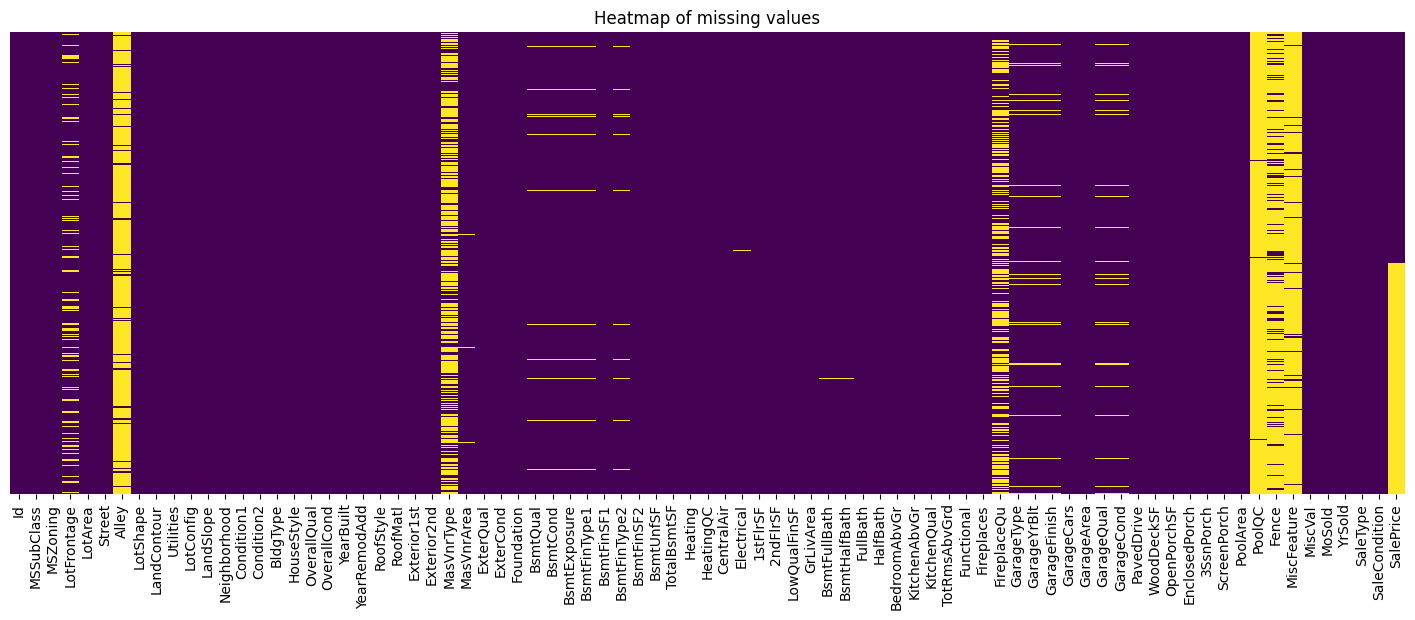

In [15]:
plt.figure(figsize=(18, 6))
plt.title('Heatmap of missing values')
sns.heatmap(df_combined.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

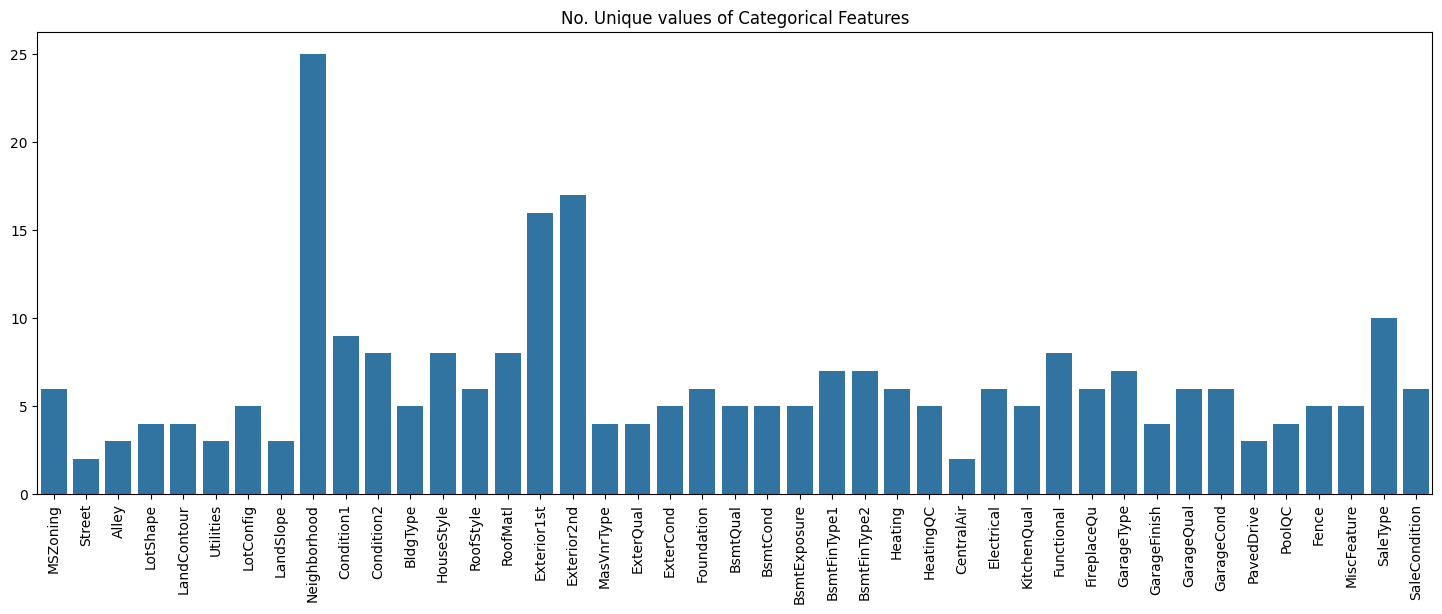

In [16]:
unique_values = []
for col in object_cols:
    unique_values.append(df_combined[col].unique().size)
plt.figure(figsize=(18, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)

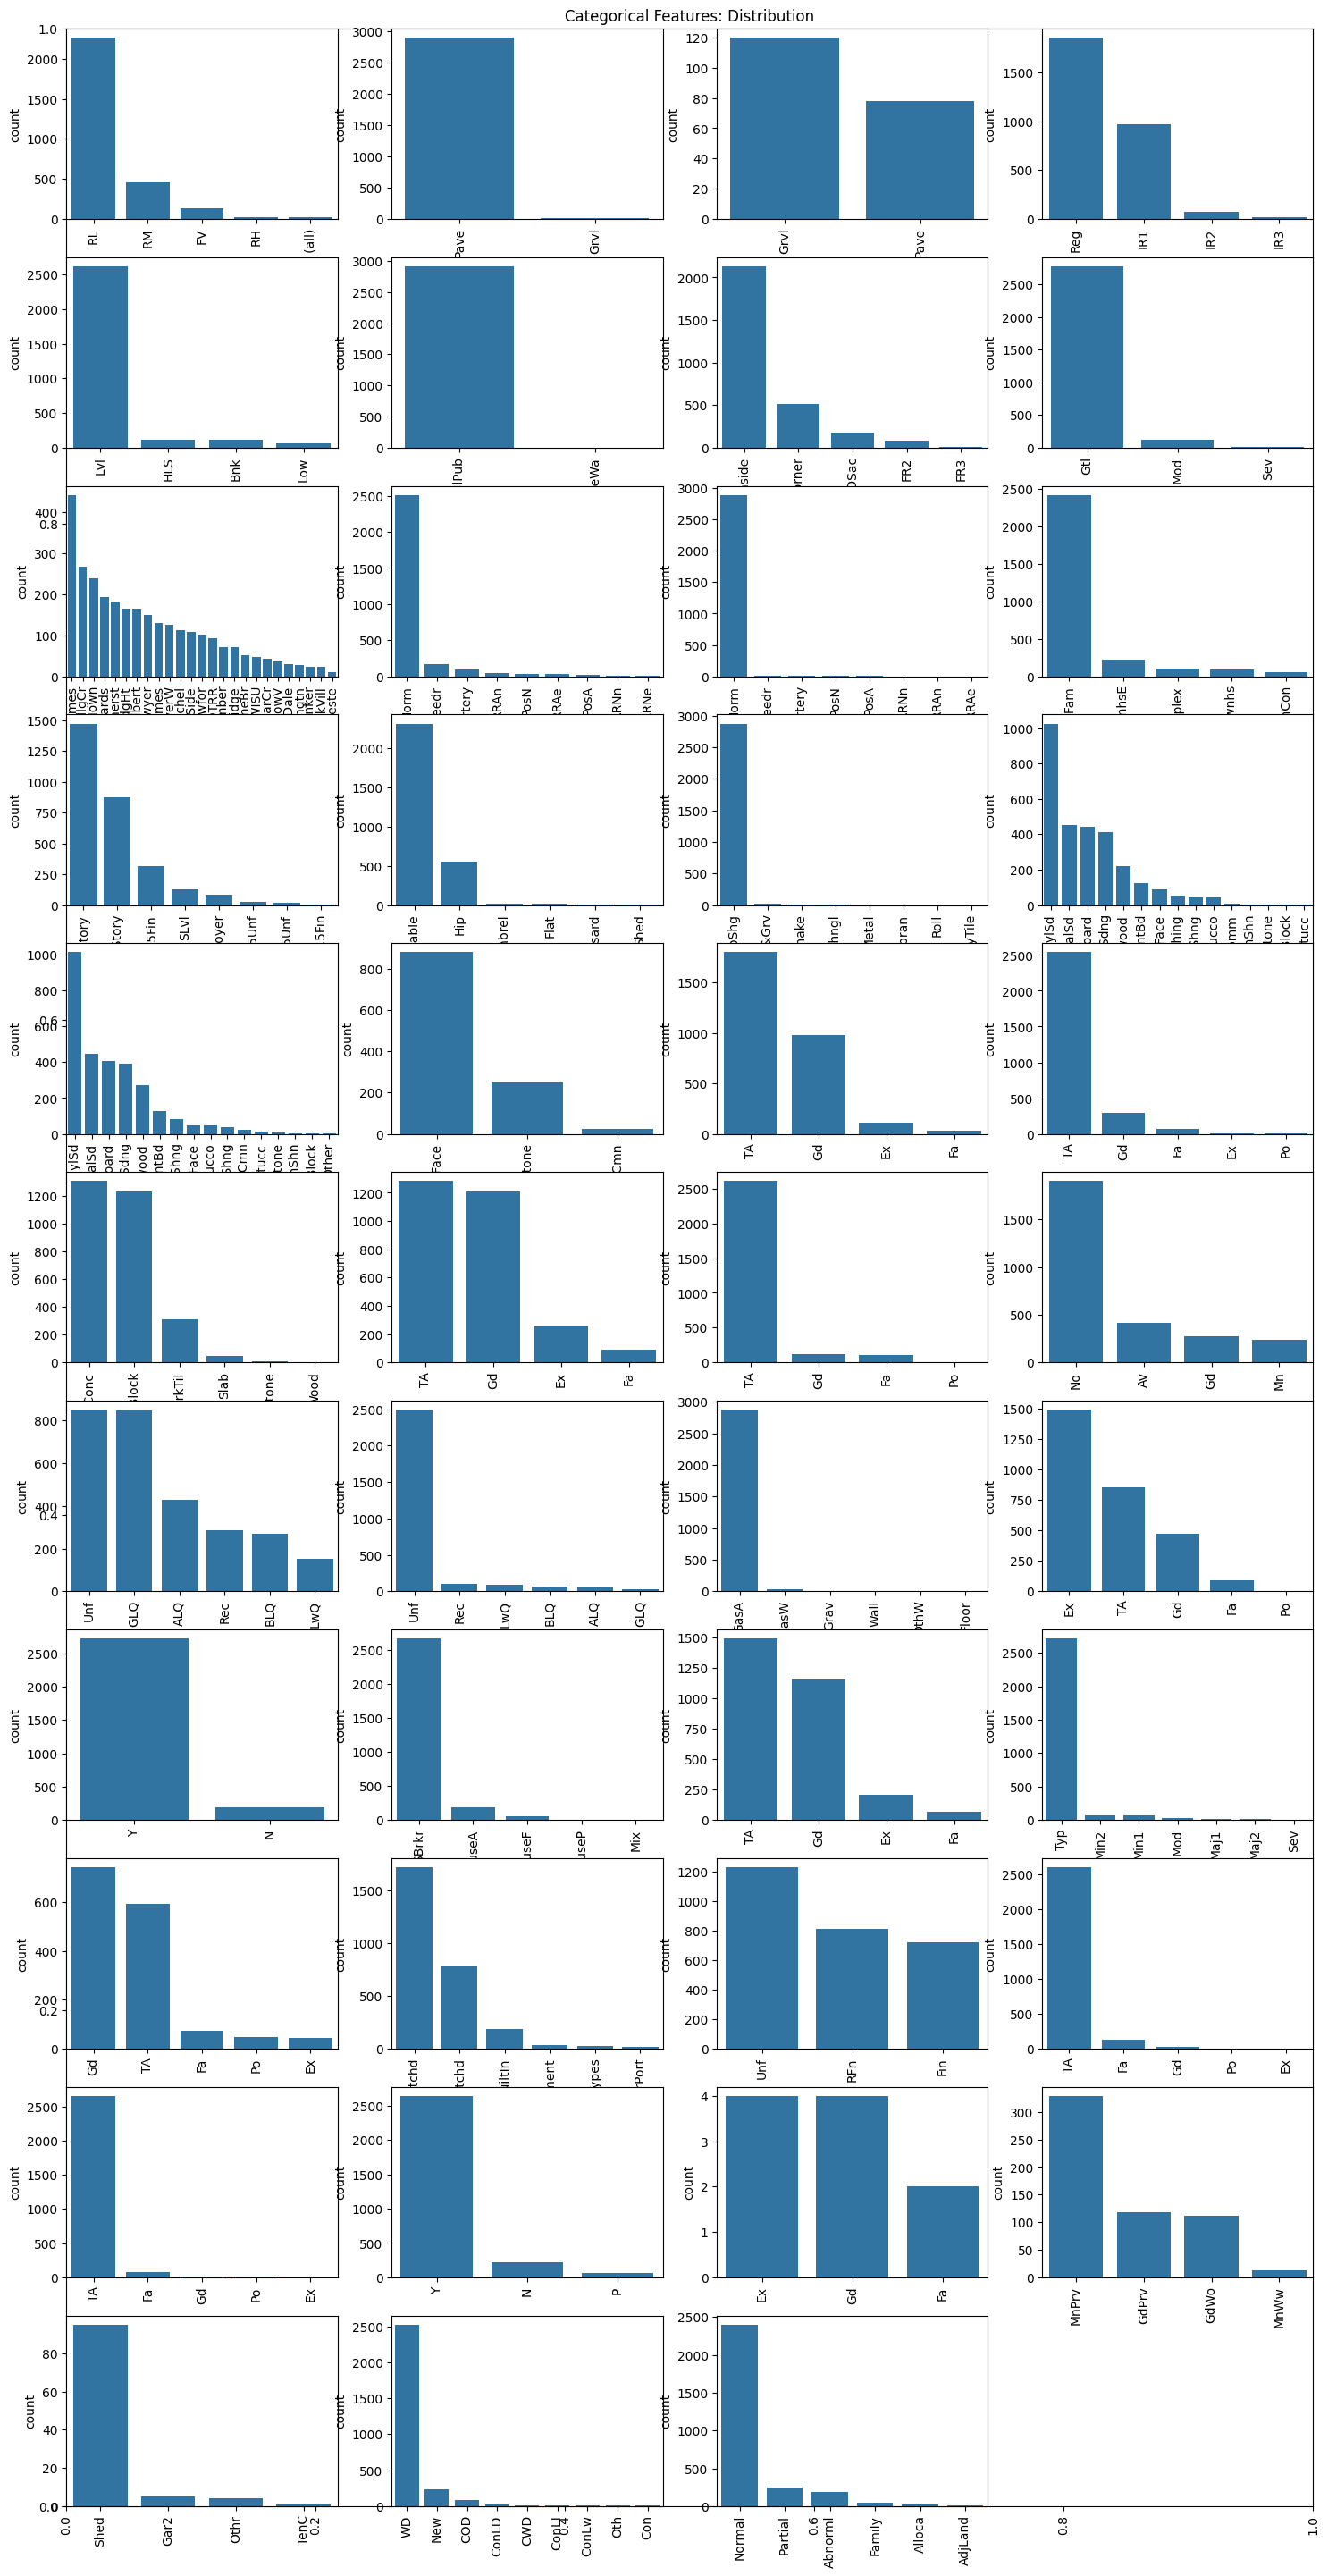

In [17]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
    y = df_combined[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

Xử lý dữ liệu

In [18]:
# Kiểm tra xem cột 'Id' có tồn tại không trước khi xóa
if 'Id' in df_combined.columns:
    df_combined.drop(columns='Id', inplace=True)
    print('Drop Id \n')
else:
    print('Column "Id" not found. Skipping drop operation.\n')

# Điền giá trị thiếu cho các cột kiểu danh mục với mode
categorical_columns = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual',
                       'Functional']
for col in categorical_columns:
    if col in df_combined.columns:
        df_combined[col] = df_combined[col].fillna(df_combined[col].mode()[0])
        print(f'{col}: Fill missing values with mode \n')

# Xử lý giá trị thiếu trong cột 'FireplaceQu'
if 'FireplaceQu' in df_combined.columns:
    df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('NA')
    print('FireplaceQu: Fill missing values with "NA" \n')

# Xử lý giá trị thiếu trong cột 'PoolQC' với điều kiện PoolArea > 0
if 'PoolQC' in df_combined.columns and 'PoolArea' in df_combined.columns:
    df_combined.loc[(df_combined['PoolQC'].isnull()) & df_combined['PoolArea'] > 0, 'PoolQC'] = \
    df_combined['PoolQC'].mode()[0]
    df_combined['PoolQC'] = df_combined['PoolQC'].fillna('NA')
    print('PoolQC: Fill missing values with mode for PoolArea > 0 and "NA" for others \n')

# Điền giá trị thiếu cho 'SaleType'
if 'SaleType' in df_combined.columns:
    df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0], inplace=True)
    print('SaleType: Fill missing values with mode \n')

# Xóa các cột không cần thiết
columns_to_drop = ['Fence', 'MiscFeature', 'SalePrice']
df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns], inplace=True)
print('Drop Fence, MiscFeature and SalePrice\n')

# Xử lý giá trị thiếu cho các tính năng Basement
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in basement_columns:
    if col in df_combined.columns:
        if col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
            df_combined[col] = df_combined[col].fillna(0)
        else:
            df_combined[col] = df_combined[col].fillna('NA')
        print(f'{col}: Fill missing values with "NA" or 0 \n')

# Xử lý giá trị thiếu cho các tính năng Garage
garage_columns = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual', 'GarageCars', 'GarageArea', 'GarageYrBlt']
for col in garage_columns:
    if col in df_combined.columns:
        if col in ['GarageCars', 'GarageArea', 'GarageYrBlt']:
            df_combined[col] = df_combined[col].fillna(0)
        else:
            df_combined[col] = df_combined[col].fillna('NA')
        print(f'{col}: Fill missing values with "NA" or 0 \n')

# Kiểm tra lại giá trị thiếu
print("Check for missing values:\n", df_combined.isnull().sum())


Drop Id 

MSZoning: Fill missing values with mode 

Exterior1st: Fill missing values with mode 

Exterior2nd: Fill missing values with mode 

MasVnrType: Fill missing values with mode 

Electrical: Fill missing values with mode 

KitchenQual: Fill missing values with mode 

Functional: Fill missing values with mode 

FireplaceQu: Fill missing values with "NA" 

PoolQC: Fill missing values with mode for PoolArea > 0 and "NA" for others 

SaleType: Fill missing values with mode 

Drop Fence, MiscFeature and SalePrice

BsmtQual: Fill missing values with "NA" or 0 

BsmtCond: Fill missing values with "NA" or 0 

BsmtExposure: Fill missing values with "NA" or 0 

BsmtFinType1: Fill missing values with "NA" or 0 

BsmtFinType2: Fill missing values with "NA" or 0 

BsmtFinSF1: Fill missing values with "NA" or 0 

BsmtFinSF2: Fill missing values with "NA" or 0 

BsmtUnfSF: Fill missing values with "NA" or 0 

TotalBsmtSF: Fill missing values with "NA" or 0 

BsmtFullBath: Fill missing values w

C:\Users\Admin\AppData\Local\Temp\ipykernel_21764\3710115909.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0], inplace=True)


In [19]:
df_combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,272,0,0,0,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,NA,0,12,2008,WD,Normal


Kiểm tra lại dữ liệu sau xử lý

In [20]:
print(df_combined.isnull().sum().sum())

3232


Tiền xử lý dữ liệu

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
s = (df_combined.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  41


In [23]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_combined[object_cols]))
OH_cols.index = df_combined.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df_combined.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [24]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Kiểm tra xem dữ liệu có nhất quán không

print('df_final shape:', df_final.shape)
print('df_train shape:', df_Train.shape)
print('df_test shape:', df_Test.shape)

X_Train = pd.DataFrame(df_final[:1460])
X_Test = pd.DataFrame(df_final[1460:])
Y_Train = df_Train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:', X_Test.shape)

df_final shape: (2919, 292)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 292)
Y_train shape: (1460,)
X_test shape: (1459, 292)


Chọn model và dự đoán 

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra

X_train, X_valid, Y_train, Y_valid = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))


17495.891404109585


In [28]:
import warnings

warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03, n_estimators=200, objective='reg:squarederror')
model_XGBR.fit(X_train, Y_train)
Y_pred = model_XGBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

16705.248046875


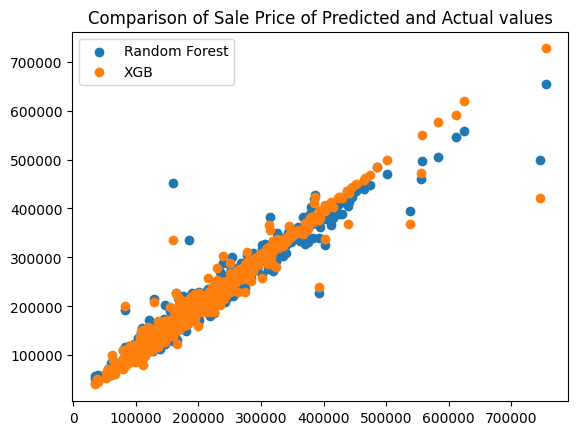

In [29]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train, model_RFR.predict(X_Train), label='Random Forest')
plt.scatter(Y_Train, model_XGBR.predict(X_Train), label='XGB')
plt.legend()

In [30]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Định nghĩa model LightGBM
lgbm_model = LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=15, random_state=0)

# Huấn luyện mô hình
lgbm_model.fit(X_train, Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3193
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 184
[LightGBM] [Info] Start training from score 180808.898973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

LGBMRegressor(learning_rate=0.01, max_depth=15, n_estimators=1000,
              random_state=0)

In [31]:
# Dự đoán trên tập validation
Y_pred = lgbm_model.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

17043.114732733382


In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo model với tối ưu tốc độ và độ chính xác
catboost_model = CatBoostRegressor(
    iterations=3000,               # Số vòng lặp lớn hơn
    learning_rate=0.03,            # Learning rate cao hơn -> học nhanh hơn
    depth=8,                       # Depth vừa đủ để tránh overfit nhưng vẫn mạnh
    l2_leaf_reg=3,                 # Regularization để tránh overfit
    random_state=0,
    early_stopping_rounds=100,     # Dừng sớm khi không cải thiện
    verbose=100
)

# Huấn luyện mô hình
catboost_model.fit(
    X_train, Y_train,
    eval_set=(X_valid, Y_valid),
    use_best_model=True            # Giữ lại model tốt nhất trên tập validation
)

0:	learn: 76959.9992244	test: 81682.3194273	best: 81682.3194273 (0)	total: 181ms	remaining: 9m 2s
100:	learn: 23965.6697223	test: 35540.9317074	best: 35540.9317074 (100)	total: 4.29s	remaining: 2m 2s
200:	learn: 16341.4060294	test: 31718.4522505	best: 31718.4522505 (200)	total: 8.56s	remaining: 1m 59s
300:	learn: 13324.7159270	test: 30625.2454638	best: 30623.4525044 (297)	total: 11.9s	remaining: 1m 46s
400:	learn: 11325.0187361	test: 29979.0578479	best: 29975.5835725 (399)	total: 15.4s	remaining: 1m 39s
500:	learn: 9571.7855899	test: 29720.6669298	best: 29720.6669298 (500)	total: 18.4s	remaining: 1m 31s
600:	learn: 8244.2754873	test: 29534.1679204	best: 29534.1679204 (600)	total: 21.4s	remaining: 1m 25s
700:	learn: 7007.6691740	test: 29414.8918701	best: 29412.8557460 (698)	total: 24.4s	remaining: 1m 20s
800:	learn: 6075.3644149	test: 29331.6016440	best: 29331.6016440 (800)	total: 27.5s	remaining: 1m 15s
900:	learn: 5403.8980881	test: 29235.5983634	best: 29233.1721290 (898)	total: 30.4s

In [33]:
# Dự đoán trên tập validation
Y_pred = catboost_model.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

15724.832150630758


In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
import numpy as np

# Khởi tạo mô hình XGBoost với tối ưu hiệu suất
xgb = XGBRegressor(
    random_state=0,
    n_jobs=-1,
    tree_method='hist',  # Sử dụng 'hist' để tăng tốc độ huấn luyện
    booster='gbtree',    # Cải thiện độ chính xác (đặc biệt với dữ liệu nhỏ)
    objective='reg:squarederror'  # Cải thiện việc tối ưu hóa cho regression
)

# Không gian tìm kiếm siêu tham số tối ưu hơn
param_dist = {
    'n_estimators': randint(100, 500),   # Điều chỉnh số vòng lặp tối ưu hơn
    'max_depth': randint(4, 12),          # Thử độ sâu lớn hơn để tăng khả năng học
    'learning_rate': uniform(0.01, 0.2),  # Tăng phạm vi learning_rate để tìm giá trị tốt nhất
    'subsample': uniform(0.7, 0.3),       # Điều chỉnh cho mỗi cây học từ phần dữ liệu ngẫu nhiên
    'colsample_bytree': uniform(0.6, 0.4),# Thử giá trị colsample rộng hơn
    'gamma': uniform(0, 0.5),             # Tăng phạm vi cho gamma để giảm overfitting
    'reg_alpha': uniform(0, 0.2),         # Tăng mức độ regularization (L1)
    'reg_lambda': uniform(1, 2),          # Điều chỉnh regularization (L2)
    'scale_pos_weight': [1, 10]           # Thêm tham số để cân bằng các lớp nếu có mất cân bằng
}

# Dùng RandomizedSearchCV để tìm kiếm tham số tối ưu
grid_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,                              # Giảm nếu muốn nhanh, tăng nếu muốn tìm kỹ
    scoring='neg_mean_squared_error',       # Đánh giá bằng lỗi bình phương âm
    cv=5,                                   # Sử dụng cross-validation 5 lần
    verbose=1,
    random_state=0,
    n_jobs=-1                                # Sử dụng tất cả CPU
)

# Huấn luyện trên tập train
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_r...
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025D76D5FE20>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025D77B2CB20>,
                                        'scale_pos_weight': [1, 10],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025D77B2CC40>},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [35]:
# Dự đoán trên tập validation
Y_pred = grid_search.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

16095.4638671875


In [36]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.7168590107170195), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None,
             gamma=np.float64(0.12041438995772341), grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.030058788453099568), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=426, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [37]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Base models với cấu hình nhẹ hơn nhưng hiệu quả
estimators = [
    ('lgbm', LGBMRegressor(
        n_estimators=300,      # Giảm số vòng lặp để tăng tốc
        learning_rate=0.03,    # Học nhanh hơn
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=0
    )),
    ('xgb', XGBRegressor(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=0,
        n_jobs=-1
    )),
    ('cat', CatBoostRegressor(
        iterations=300,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_state=0,
        verbose=0
    ))
]

# Meta-model (Ridge) dùng để tổng hợp dự đoán
final_model = Ridge(alpha=0.5)  # Tăng khả năng khớp nhẹ

# Tạo mô hình Stacking
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_model,
    n_jobs=-1,
    passthrough=False,  # Không cần đưa cả đầu vào gốc cho meta-model → tăng tốc
    cv=5
)

# Huấn luyện mô hình
stack_model.fit(X_train, Y_train)

StackingRegressor(cv=5,
                  estimators=[('lgbm',
                               LGBMRegressor(colsample_bytree=0.8,
                                             learning_rate=0.03, max_depth=6,
                                             n_estimators=300, random_state=0,
                                             subsample=0.8)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x0000025D76D1FCD0>)],
                  final_estimator=Ridge(alpha=0.5), n_jobs=-1)

In [38]:
# Dự đoán trên tập validation
Y_pred = stack_model.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

16340.867421707824


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Khởi tạo mô hình RandomForest với thiết lập cơ bản
rf = RandomForestRegressor(
    n_jobs=-1,             # Dùng toàn bộ CPU
    random_state=42
)

# Không gian siêu tham số được điều chỉnh lại gọn và hợp lý hơn
param_dist = {
    'n_estimators': [100, 150, 200],              # 300 trở lên có thể chậm, 150 thường đủ tốt
    'max_features': ['sqrt', 'log2'],             # 'auto' không khuyến khích (deprecated từ v1.1+)
    'max_depth': [6, 8, 10, None],                # Thêm lựa chọn 10
    'min_samples_split': [2, 5],                  # Bỏ giá trị 10 để giảm độ phức tạp
    'min_samples_leaf': [1, 2]                    # 1–2 thường là tốt với regression
}

# RandomizedSearchCV với số lượng thử hợp lý để tránh chậm
random_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,               # Giảm từ 100 → 30 để tăng tốc
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'  # Dùng MAE để đánh giá tốt hơn với regression
)

# Huấn luyện mô hình
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [40]:
Y_pred = random_cv.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

18244.525513698627


In [41]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Xây dựng mô hình cải tiến
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),       # Ổn định quá trình huấn luyện
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Dùng Adam với learning rate điều chỉnh
optimizer = Adam(learning_rate=0.0015)

# Biên dịch mô hình
model.compile(optimizer=optimizer, loss='mse')

# Callback dừng sớm
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Huấn luyện mô hình
history = model.fit(
    X_train_scaled, Y_train,
    validation_data=(X_valid_scaled, Y_valid),
    epochs=150,
    batch_size=64,  # Batch size lớn hơn → train nhanh hơn (nếu đủ RAM/GPU)
    callbacks=[early_stop],
    verbose=1
)

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# Dự đoán trên tập validation
Y_pred = model.predict(X_valid_scaled)
print(mean_absolute_error(Y_valid, Y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
60657.84375


In [ ]:
regressor = grid_search.best_estimator_
Y_pred = regressor.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

16309.5888671875


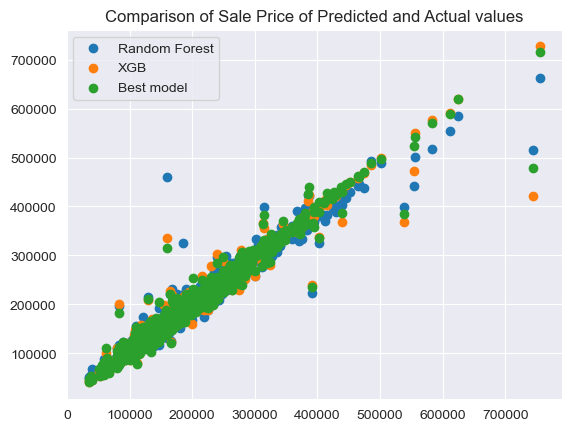

In [ ]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train, model_RFR.predict(X_Train), label='Random Forest')
plt.scatter(Y_Train, model_XGBR.predict(X_Train), label='XGB')
plt.scatter(Y_Train, regressor.predict(X_Train), label='Best model')
plt.legend()

Trả về kết quả để nộp

In [ ]:
Y_Pred = regressor.predict(X_Test)

In [ ]:
Y_Pred

array([125630.086, 157341.73 , 183523.22 , ..., 163707.05 , 114598.305,
       228595.58 ], dtype=float32)

In [ ]:
Y_Pred.shape

(1459,)

In [ ]:
output = pd.DataFrame({'Id': df_Test['Id'], 'SalePrice': Y_Pred})
output.to_csv('submission.csv', index=False)